[View in Colaboratory](https://colab.research.google.com/github/mizunashi92/dlhub/blob/master/Good_or_Bad_Leader.ipynb)

In [143]:
# Setup, download, unzip
!wget https://www.dropbox.com/s/qoy2rwfq71fobfy/DL.zip
!unzip -qq DL.zip

!ls

--2018-08-09 09:44:30--  https://www.dropbox.com/s/qoy2rwfq71fobfy/DL.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.1, 2620:100:601a:1::a27d:701
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qoy2rwfq71fobfy/DL.zip [following]
--2018-08-09 09:44:30--  https://www.dropbox.com/s/raw/qoy2rwfq71fobfy/DL.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc24307e8c599ea326748ca85e05.dl.dropboxusercontent.com/cd/0/inline/ANezG1uD0G7jbU9fefaDbuFQWit3TTw2zTEY4pGl4BH9KxHyIua8e14CMqOG-tPIH8o8U2y1O8M08bZ3lNklFSqyj84m9dCl8lLdZBl9JzUpiA1ySkhmcO0oimbSe8gTO9HNS2iq4_TrLbHrZGT8qz5gpwZIJsubWifv8T8Ui4SjkGEzGah8EHh7FxkKsJCKOc0/file [following]
--2018-08-09 09:44:31--  https://uc24307e8c599ea326748ca85e05.dl.dropboxusercontent.com/cd/0/inline/ANezG1uD0G7jbU9fefaDbuFQWit3TTw2zTEY4pGl4BH9KxHyIua8e14CMqOG-tPIH8o8U

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model

import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

In [159]:
img_width, img_height = 299, 299
train_data_dir = "./Train"
validation_data_dir = "./Test"

nb_train_samples = 179
nb_validation_samples = 21 
batch_size = 16
epochs = 5


##preprocessing##prepr 
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)


# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 179 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [0]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [175]:
# Train the model 
model.fit_generator( train_generator,
steps_per_epoch= 1,                    
epochs = epochs,
validation_data = validation_generator,
validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 1.1739e-07 - acc: 1.0000 - val_loss: 4.9387 - val_acc: 0.6875
Epoch 2/5
1/1 [==============================] - 0s 389ms/step - loss: 1.1801e-07 - acc: 1.0000 - val_loss: 3.1885 - val_acc: 0.8000
Epoch 3/5
1/1 [==============================] - 0s 488ms/step - loss: 1.1201e-07 - acc: 1.0000 - val_loss: 6.3770 - val_acc: 0.6000
Epoch 4/5
1/1 [==============================] - 0s 463ms/step - loss: 1.1681e-07 - acc: 1.0000 - val_loss: 9.4268 - val_acc: 0.4000
Epoch 5/5
1/1 [==============================] - 0s 433ms/step - loss: 1.1441e-07 - acc: 1.0000 - val_loss: 3.0498 - val_acc: 0.8000


In [176]:
model.evaluate_generator(validation_generator, validation_samples)

[3.820369442119156, 0.7581395382104918]

In [177]:
metrics = model.evaluate_generator(validation_generator,10,10,workers=1)
print("model accuracy:",metrics[1])

model accuracy: 0.7619047653107416


In [0]:
model.save('goodbad.hdf5')

In [0]:
model = load_model('goodbad.hdf5')

In [169]:
from google.colab import files
files.upload()
# choose the file on your computer to upload it then


{}

In [172]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

img_path = './ahok.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 299, 299, 3)


In [178]:
preds = model.predict(x)
print('Predicted:', preds)

Predicted: [[1.]]


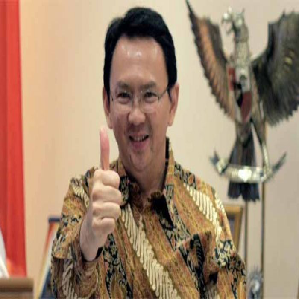

In [174]:
img